In [45]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np
from sklearn import metrics
from collections import defaultdict
import seaborn as sns
import matplotlib.pyplot as plt


In [46]:
#read in data
raw_df = pd.read_csv('genres_v2.csv')
print(len(raw_df))

42305


/var/folders/dg/__dfrjn55w96nv1hz5r7_kc40000gn/T/ipykernel_49800/1520859028.py:2: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_df = pd.read_csv('genres_v2.csv')


In [47]:
raw_df.head(10)


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN
5,0.721,0.568,0,-11.295,1,0.4140,0.0452,0.212000,0.1280,0.1090,...,6fsypiJHyWmeINsOLC1cos,spotify:track:6fsypiJHyWmeINsOLC1cos,https://api.spotify.com/v1/tracks/6fsypiJHyWme...,https://api.spotify.com/v1/audio-analysis/6fsy...,112511,4,Dark Trap,Gatteka,NaN,NaN
6,0.718,0.668,8,-4.162,1,0.1370,0.0254,0.007800,0.1240,0.0380,...,0XfQbq7DaMOmVXgQ71eA6E,spotify:track:0XfQbq7DaMOmVXgQ71eA6E,https://api.spotify.com/v1/tracks/0XfQbq7DaMOm...,https://api.spotify.com/v1/audio-analysis/0XfQ...,77584,4,Dark Trap,kamikaze (+ pulse),NaN,NaN
7,0.694,0.711,8,-5.525,1,0.2210,0.0397,0.000000,0.1120,0.2830,...,0LLeuNBWPOg3XA73yab3PT,spotify:track:0LLeuNBWPOg3XA73yab3PT,https://api.spotify.com/v1/tracks/0LLeuNBWPOg3...,https://api.spotify.com/v1/audio-analysis/0LLe...,127524,3,Dark Trap,T.R.U. (Totally Rotten Underground),NaN,NaN
8,0.774,0.751,1,-2.445,1,0.1980,0.0614,0.000000,0.0728,0.1890,...,37gqBnUAZe8BY8WR56kDNk,spotify:track:37gqBnUAZe8BY8WR56kDNk,https://api.spotify.com/v1/tracks/37gqBnUAZe8B...,https://api.spotify.com/v1/audio-analysis/37gq...,140326,4,Dark Trap,I Put My Dick in Your Mental,NaN,NaN
9,0.893,0.907,11,-10.406,1,0.3670,0.1520,0.031100,0.5580,0.3020,...,2ggqfj97qyiORmXoVFzP5j,spotify:track:2ggqfj97qyiORmXoVFzP5j,https://api.spotify.com/v1/tracks/2ggqfj97qyiO...,https://api.spotify.com/v1/audio-analysis/2ggq...,121979,4,Dark Trap,Andromeda,NaN,NaN


In [48]:
labels = raw_df['genre']
unique_labels, category_sizes = np.unique(labels, return_counts=True)
print(len(unique_labels))

raw_df = raw_df.drop(columns=['id', 'type', 'uri', 'track_href', 'analysis_url', 'time_signature', 'genre', 'song_name', 'Unnamed: 0', 'title'])
raw_df.head(10)

15


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,156.985,124539
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,115.080,224427
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,218.050,98821
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,186.948,123661
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,147.988,123298
5,0.721,0.568,0,-11.295,1,0.4140,0.0452,0.212000,0.1280,0.1090,144.915,112511
6,0.718,0.668,8,-4.162,1,0.1370,0.0254,0.007800,0.1240,0.0380,130.826,77584
7,0.694,0.711,8,-5.525,1,0.2210,0.0397,0.000000,0.1120,0.2830,138.049,127524
8,0.774,0.751,1,-2.445,1,0.1980,0.0614,0.000000,0.0728,0.1890,219.960,140326
9,0.893,0.907,11,-10.406,1,0.3670,0.1520,0.031100,0.5580,0.3020,199.942,121979


In [50]:
print(unique_labels)

['Dark Trap' 'Emo' 'Hiphop' 'Pop' 'Rap' 'RnB' 'Trap Metal'
 'Underground Rap' 'dnb' 'hardstyle' 'psytrance' 'techhouse' 'techno'
 'trance' 'trap']


<Axes: xlabel='danceability', ylabel='energy'>

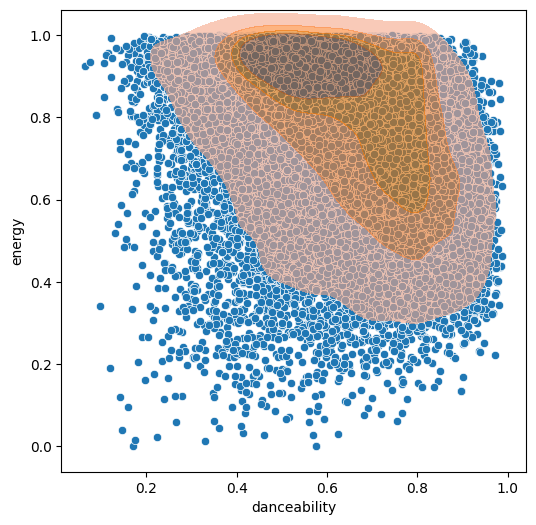

In [49]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(raw_df, x="danceability", y="energy")
sns.kdeplot(
    data=raw_df,
    x="danceability",
    y="energy",
    levels=5,
    fill=True,
    alpha=0.6,
    cut=2,
    ax=ax,
)


<Axes: >

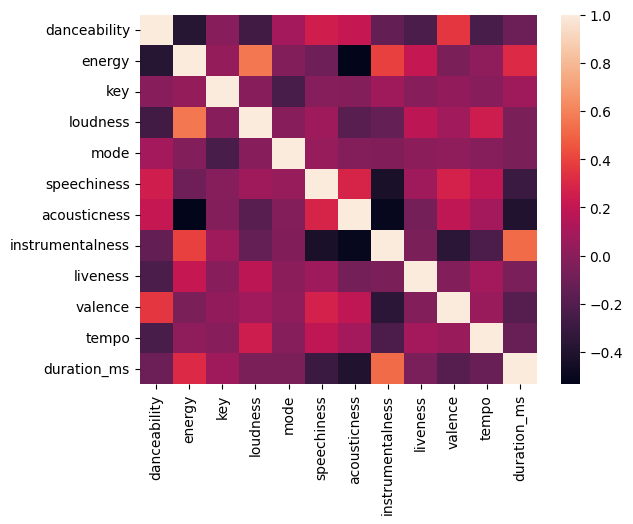

In [51]:
correlations = raw_df.corr('spearman')
sns.heatmap(correlations)


In [73]:
#cluster off numerical fields

scores = defaultdict(list)
km = KMeans(n_clusters=15, random_state=0, n_init="auto")
for seed in range(10):
    km.set_params(random_state=seed)
    km.fit(raw_df)
    scores["Homogeneity"].append(metrics.homogeneity_score(labels, km.labels_))
    scores["Completeness"].append(metrics.completeness_score(labels, km.labels_))
    scores["V-measure"].append(metrics.v_measure_score(labels, km.labels_))
    scores["Adjusted Rand-Index"].append(
        metrics.adjusted_rand_score(labels, km.labels_)
    )
    scores["Silhouette Coefficient"].append(
        metrics.silhouette_score(raw_df, km.labels_, sample_size=2000)
    )
for score_name, score_values in scores.items():
    mean_score, std_score = np.mean(score_values), np.std(score_values)
    print(f"{score_name}: {mean_score:.3f} ± {std_score:.3f}")


Homogeneity: 0.286 ± 0.010
Completeness: 0.280 ± 0.010
V-measure: 0.283 ± 0.010
Adjusted Rand-Index: 0.134 ± 0.008
Silhouette Coefficient: 0.111 ± 0.007


In [74]:
for i in [2,3,4,5,6,7,8,9,10,11,12,13,14]:
    scores = defaultdict(list)
    km = KMeans(n_clusters=i, random_state=0, n_init="auto")
    for seed in range(10):
        km.set_params(random_state=seed)
        km.fit(raw_df)
        scores["Homogeneity"].append(metrics.homogeneity_score(labels, km.labels_))
        scores["Completeness"].append(metrics.completeness_score(labels, km.labels_))
        scores["V-measure"].append(metrics.v_measure_score(labels, km.labels_))
        scores["Adjusted Rand-Index"].append(
            metrics.adjusted_rand_score(labels, km.labels_)
        )
        scores["Silhouette Coefficient"].append(
            metrics.silhouette_score(raw_df, km.labels_, sample_size=2000)
        )
    for score_name, score_values in scores.items():
        mean_score, std_score = np.mean(score_values), np.std(score_values)
        print(f"{score_name}: {mean_score:.3f} ± {std_score:.3f}")
    
    print()
    print()


Homogeneity: 0.144 ± 0.003
Completeness: 0.552 ± 0.003
V-measure: 0.228 ± 0.004
Adjusted Rand-Index: 0.094 ± 0.005
Silhouette Coefficient: 0.153 ± 0.004


Homogeneity: 0.209 ± 0.000
Completeness: 0.499 ± 0.001
V-measure: 0.294 ± 0.001
Adjusted Rand-Index: 0.141 ± 0.000
Silhouette Coefficient: 0.143 ± 0.003


Homogeneity: 0.225 ± 0.000
Completeness: 0.445 ± 0.000
V-measure: 0.299 ± 0.000
Adjusted Rand-Index: 0.149 ± 0.000
Silhouette Coefficient: 0.142 ± 0.004


Homogeneity: 0.240 ± 0.007
Completeness: 0.406 ± 0.012
V-measure: 0.301 ± 0.009
Adjusted Rand-Index: 0.151 ± 0.006
Silhouette Coefficient: 0.128 ± 0.007


Homogeneity: 0.241 ± 0.011
Completeness: 0.362 ± 0.016
V-measure: 0.290 ± 0.013
Adjusted Rand-Index: 0.151 ± 0.009
Silhouette Coefficient: 0.122 ± 0.005


Homogeneity: 0.247 ± 0.009
Completeness: 0.340 ± 0.012
V-measure: 0.286 ± 0.010
Adjusted Rand-Index: 0.152 ± 0.013
Silhouette Coefficient: 0.122 ± 0.004


Homogeneity: 0.247 ± 0.012
Completeness: 0.319 ± 0.016
V-measure: 0.27

In [ ]:
#some scatter plot colored by cluster label



In [ ]:
### now we are looking at what to do with PCA

## PCA 

In [75]:
n_features = len(raw_df.columns)

pca = []
var_ratio = []
nums = np.arange(n_features) + 1

for n_comp in nums:
    pca_ = PCA(n_components=n_comp).fit(raw_df)
    pca.append(pca_)
    var_ratio.append(np.sum(pca_.explained_variance_ratio_))



In [55]:
print(n_features)

12


Text(0.5, 1.0, 'n_components vs. Explained Variance Ratio')

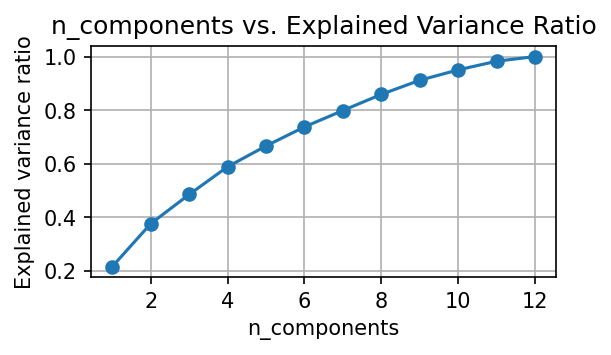

In [76]:
#choose num_components (85% explained ish)
plt.figure(figsize=(4,2),dpi=150)
plt.grid()
plt.plot(nums,var_ratio,marker='o')
plt.xlabel('n_components')
plt.ylabel('Explained variance ratio')
plt.title('n_components vs. Explained Variance Ratio')


<Axes: ylabel='Density'>

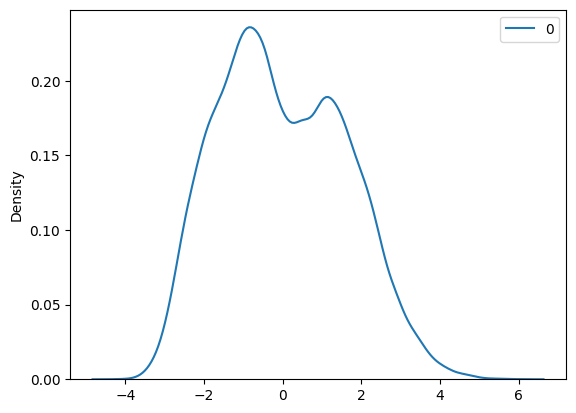

In [77]:
PCA_1 = pca[0].transform(raw_df)
sns.kdeplot(data=PCA_1)

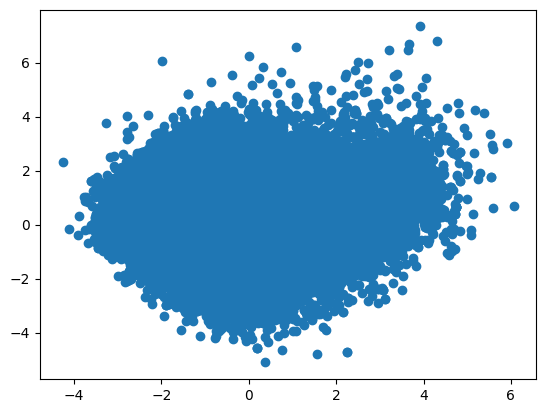

In [78]:
PCA_2 = pca[1].transform(raw_df)
plt.scatter(PCA_2[:,0], PCA_2[:,1])
plt.show()

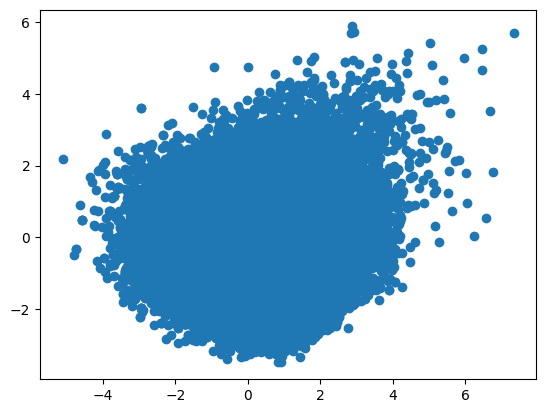

In [79]:
PCA_3 = pca[2].transform(raw_df)
plt.scatter(PCA_3[:,1], PCA_3[:,2])
plt.show()

In [80]:
scores = defaultdict(list)
km = KMeans(n_clusters=15, random_state=0, n_init="auto")
for seed in range(10):
    km.set_params(random_state=seed)
    km.fit(PCA_2)
    scores["Homogeneity"].append(metrics.homogeneity_score(labels, km.labels_))
    scores["Completeness"].append(metrics.completeness_score(labels, km.labels_))
    scores["V-measure"].append(metrics.v_measure_score(labels, km.labels_))
    scores["Adjusted Rand-Index"].append(
        metrics.adjusted_rand_score(labels, km.labels_)
    )
    scores["Silhouette Coefficient"].append(
        metrics.silhouette_score(PCA_2, km.labels_, sample_size=2000)
    )
for score_name, score_values in scores.items():
    mean_score, std_score = np.mean(score_values), np.std(score_values)
    print(f"{score_name}: {mean_score:.3f} ± {std_score:.3f}")


Homogeneity: 0.293 ± 0.001
Completeness: 0.288 ± 0.001
V-measure: 0.291 ± 0.001
Adjusted Rand-Index: 0.136 ± 0.003
Silhouette Coefficient: 0.316 ± 0.007


In [81]:
scores = defaultdict(list)
km = KMeans(n_clusters=15, random_state=0, n_init="auto")
for seed in range(10):
    km.set_params(random_state=seed)
    km.fit(PCA_1)
    scores["Homogeneity"].append(metrics.homogeneity_score(labels, km.labels_))
    scores["Completeness"].append(metrics.completeness_score(labels, km.labels_))
    scores["V-measure"].append(metrics.v_measure_score(labels, km.labels_))
    scores["Adjusted Rand-Index"].append(
        metrics.adjusted_rand_score(labels, km.labels_)
    )
    scores["Silhouette Coefficient"].append(
        metrics.silhouette_score(PCA_1, km.labels_, sample_size=2000)
    )
for score_name, score_values in scores.items():
    mean_score, std_score = np.mean(score_values), np.std(score_values)
    print(f"{score_name}: {mean_score:.3f} ± {std_score:.3f}")


Homogeneity: 0.225 ± 0.000
Completeness: 0.226 ± 0.002
V-measure: 0.225 ± 0.001
Adjusted Rand-Index: 0.083 ± 0.001
Silhouette Coefficient: 0.519 ± 0.007


In [82]:
PCA_1

array([[ 2.02672202],
       [ 1.46757209],
       [ 0.42185532],
       ...,
       [-1.139013  ],
       [-1.02717795],
       [-0.75541061]])

In [83]:
reversed_1 = pca[0].inverse_transform(PCA_1)

reversed_2 = pca[1].inverse_transform(PCA_2)

reversed_3 = pca[2].inverse_transform(PCA_3)

reversed_11 = pca[-2].inverse_transform(pca[-2].transform(raw_df))

reversed_12 = pca[-1].inverse_transform(pca[-1].transform(raw_df))



In [84]:
reversed_1[0,:]


array([ 0.53554882, -0.91024325, -0.12609625, -0.35887622,  0.1103726 ,
        0.66878101,  0.76224382, -0.86577788, -0.26262685,  0.50172185,
        0.22688235, -0.82785507])

In [89]:
raw_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,1.223593,0.280076,-0.919287,-0.305511,0.905506,2.246525,-0.212850,-0.727222,-0.902626,0.136788,0.398872,-1.226978
1,0.508474,-1.466168,0.717309,-0.259951,0.905506,-0.453051,1.784497,-0.763361,-0.547224,-0.999574,-1.358548,-0.256793
2,1.344908,0.709837,-0.100989,0.572033,0.905506,-0.588585,-0.482129,-0.763350,0.899446,-1.363639,2.959826,-1.476770
3,-1.043081,0.100555,-1.464819,0.596853,0.905506,-0.265999,-0.424176,-0.763361,-0.570006,-0.780878,1.655465,-1.235506
4,1.012888,-0.753526,-0.919287,-0.408871,0.905506,1.239930,0.707381,-0.763361,-0.273838,1.002997,0.021554,-1.239031
...,...,...,...,...,...,...,...,...,...,...,...,...
42300,-0.711061,-0.378166,-0.373755,0.447932,0.905506,-0.841422,-0.378515,-0.762431,-0.530137,0.158229,0.106479,0.178152
42301,-0.781296,0.029835,-1.464819,-0.495232,-1.104328,-0.702718,-0.431200,-0.763312,-0.051711,0.111059,0.102914,-0.395831
42302,-1.777356,0.318156,0.717309,1.143575,0.905506,-0.682111,-0.410712,-0.762709,0.973488,-0.999574,0.312898,-0.155820
42303,-1.036696,0.862157,0.171777,0.574073,-1.104328,-0.771674,-0.559687,-0.683532,-0.891805,0.561316,0.107695,0.702562


In [85]:
reversed_2[0,:]


array([ 0.3569774 , -0.63677017, -0.15479687,  0.07657754,  0.11599599,
        0.85983036,  0.63532043, -1.1305312 , -0.04402968,  0.62302732,
        0.46128105, -1.04494721])

In [86]:
reversed_3[0,:]


array([ 1.09569737, -0.38183085, -0.37647265,  0.24811215,  0.5495274 ,
        1.00945833,  0.23584185, -1.0148964 , -0.14482581,  1.27059124,
        0.07484364, -0.87951521])

In [87]:
reversed_12[0,:]


array([ 1.2235934 ,  0.28007579, -0.91928715, -0.30551086,  0.90550643,
        2.24652504, -0.21285021, -0.72722227, -0.90262634,  0.13678821,
        0.39887164, -1.22697797])

In [88]:
reversed_11[0,:]


array([ 1.06752242, -0.27019378, -0.92087616,  0.09238055,  0.8985951 ,
        2.30443524, -0.31590703, -0.44021975, -0.87096982,  0.26304093,
        0.33948482, -1.19413434])

## PCA after scaling

In [71]:
#repeat PCA after scaling data
normalized_df=(raw_df-raw_df.mean())/raw_df.std()
normalized_df.head()


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,1.223593,0.280076,-0.919287,-0.305511,0.905506,2.246525,-0.212850,-0.727222,-0.902626,0.136788,0.398872,-1.226978
1,0.508474,-1.466168,0.717309,-0.259951,0.905506,-0.453051,1.784497,-0.763361,-0.547224,-0.999574,-1.358548,-0.256793
2,1.344908,0.709837,-0.100989,0.572033,0.905506,-0.588585,-0.482129,-0.763350,0.899446,-1.363639,2.959826,-1.476770
3,-1.043081,0.100555,-1.464819,0.596853,0.905506,-0.265999,-0.424176,-0.763361,-0.570006,-0.780878,1.655465,-1.235506
4,1.012888,-0.753526,-0.919287,-0.408871,0.905506,1.239930,0.707381,-0.763361,-0.273838,1.002997,0.021554,-1.239031


In [72]:
#append results to original df
raw_df = normalized_df

## Final Analysis

In [ ]:
#original df should have:
#original cluster labels
#PCA cluster labels
#PCA+scaled cluster labels

In [ ]:
#light EDA of clusters on each
#since cluster labels are not comparable
#examine a cluster which 'stands out'
#find this cluster in all 3 variants
#examine which types of rows of data 'moved' in and out of this interesting cluster